# ZOGYP Guide

In [1]:
import glob
import ntpath
import time
import shutil 
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

#ZOGY in Parallel routines
from zogyp.zip import run_ZOGY
from zogyp.zip import rdfits
from zogyp.zip import config_loc

#Image alignment
#from zogyp.spali2 import spalipy

#Stacking
#from zogyp.zo_coadd import med_comb
#from zogyp.zo_coadd import prop_coad


For a faster performance install pyfftw
 
 
 


^^^ The above messages will vanish if you install pyfftw ^^^

---

#### Firstly, you will need to configure sextractor and PSFex parameters to your telescope.

Use the following to find config file locations 

In [2]:
LOC = config_loc()
print('')
print('')
for i in glob.glob(LOC+'/*'):
    print(ntpath.basename(i))
    print('')


/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/configfls


check.param

check.sex

default.conv

default.nnw

default.param

default.sex

psfex.conf

spali.param

spali.sex



#### The two that need to be changed are default.sex and psfex.conf
----

Get test files:

In [3]:
t_f = LOC.replace('configfls','test')
T = [i for i in glob.glob(t_f+'/*')]
for i in T:
    print(ntpath.basename(i))

1.fits
2.fits
3.fits
4.fits


---

### Basic use: Image subtraction

Note: your first run will create the output directory "Zoutput". This will contain your subtracted images and the aligned science and refernce sub_images. Default outname "Zoutput/data_D1.fits", "Zoutput/data_S1.fits", "Zoutput/data_Scorr1.fits"

Output directory made!
Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits

 

Output files: 

Zoutput/ref_cut1.fits
Zoutput/sci_cut1.fits
Zoutput/TEST_SUB_D1.fits
Zoutput/TEST_SUB_S1.fits
Zoutput/TEST_SUB_Scorr1.fits

 



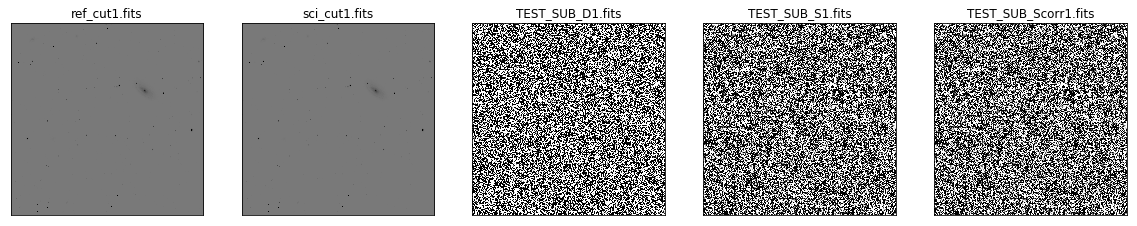

In [4]:
run_ZOGY(T[0], T[1], outname='TEST_SUB') #ZOGY image subtraction T[0] - T[1]
file_names = glob.glob('Zoutput/*')
print('\n \n')
print('Output files: \n')
for i in file_names:
    print(i)
print('\n \n')


fig, axs = plt.subplots(1, 5, figsize=(20,45))
for i in range(len(file_names)):
    D = fits.getdata(file_names[i])
    axs[i].imshow(D, cmap = 'gray_r', vmin = -np.mean(D)*20, vmax= np.mean(D)*20)
    axs[i].set_xticks([] , [])
    axs[i].set_yticks([] , [])
    axs[i].set_title(ntpath.basename(file_names[i]))
plt.show()

---

##### ZiP is a fast image subtraction tool. So if speed is a vital component for your subtraction needs pay attention to the clean_ref and clean_sci parameters. They exist to clean up small order over fitting of the PSF from PSFex. The smaller the parameter the faster the subtraction, (usually 0.25 should suffice). As this is on a normalised PSF the cleaning parameter can be between 0 and 1

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


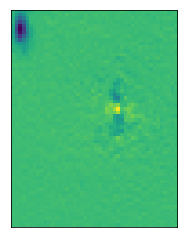

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


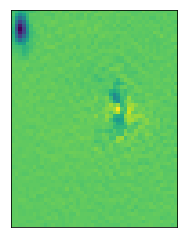

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


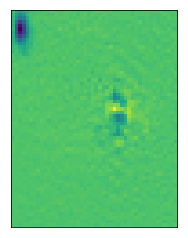

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


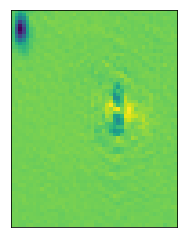

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


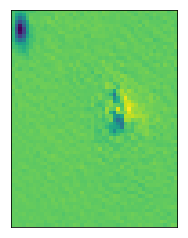

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


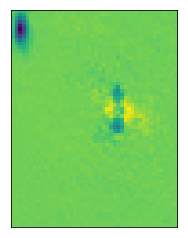

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


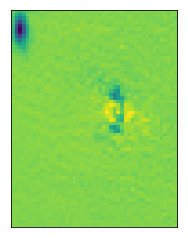

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


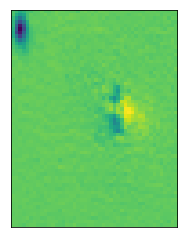

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


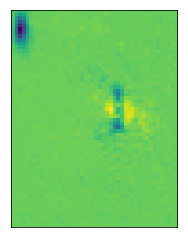

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


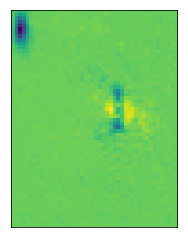

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


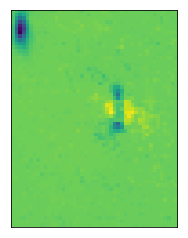

In [5]:
Array = []
PLOTS = []
for i in range(11):
    t = time.time()
    X = i/10
    run_ZOGY(T[0], T[1], clean_ref = X, clean_sci = X)
    Array.append([X, (time.time() - t)])
    plt.imshow(fits.getdata('Zoutput/data_D1.fits')[630:690, 1254:1300])
    plt.xticks([], [])
    plt.yticks([], [])
    plt.show()

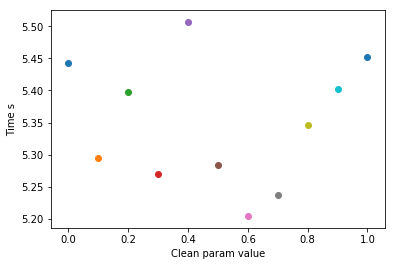

In [6]:
for i in Array:
    plt.scatter(i[0], i[1])
plt.ylabel('Time s')
plt.xlabel('Clean param value')
plt.show() 
#The test images are too small to give realistic time constraints. 
#Either test with bigger images or loop the above to take averages.

---

#### Use slices to do subtractions even faster. Slices are used primarily to apply a varrying PSF across the field.
#### This can be done in parallel and the slices are small which speeds up  the subtraction

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


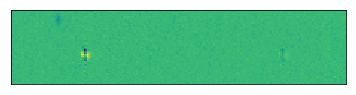

In [7]:
run_ZOGY(T[0], T[1], xslice=2, yslice=2)
plt.imshow(fits.getdata('Zoutput/data_D1.fits')[400:450, 450:675])
plt.xticks([],[])
plt.yticks([],[])
plt.show()

---

#### Sub images split the main image. These sub images can be subtracted simultaneously, and is the backbone of what makes ZiP so fast. These output images should be treated as seperate (independant images) when doing analyses.

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/sci_cut2.fits
Modelling PSF for ./Zoutput/ref_cut2.fits
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


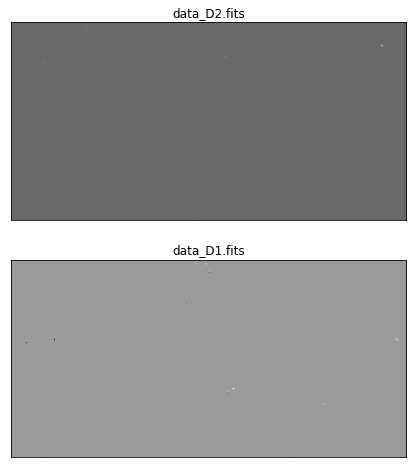

In [8]:
run_ZOGY(T[0], T[1], sub_imagex=1, sub_imagey=2)
file_names = glob.glob('Zoutput/data_D*')

fig, axs = plt.subplots(2, 1, figsize=(10,8))
for i in range(len(file_names)):
    D = fits.getdata(file_names[i])
    axs[i].imshow(D, cmap='gray')
    axs[i].set_xticks([] , [])
    axs[i].set_yticks([] , [])
    axs[i].set_title(ntpath.basename(file_names[i]))
plt.show()

#### Finally,  put all of the above together

Parallell version, using 45 cores


Making PSF catalog
Making PSF catalog
Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut2.fits
Modelling PSF for ./Zoutput/sci_cut2.fits
Modelling PSF for ./Zoutput/sci_cut1.fits
Modelling PSF for ./Zoutput/ref_cut1.fits


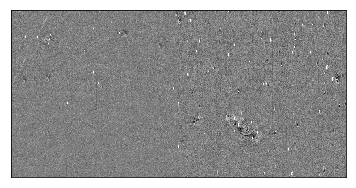

In [9]:
run_ZOGY(T[0], T[1], sub_imagex=1, sub_imagey=2,
         xslice=2, yslice=2, blackout=True,
         clean_ref = 0.75, clean_sci = 0.75,
         outname = 'FINAL')

plt.imshow(fits.getdata('Zoutput/FINAL_Scorr1.fits'), cmap='gray_r' ,vmin=-0.25, vmax=0.25)
plt.xticks([],[])
plt.yticks([],[])
plt.show()


In [10]:
shutil.rmtree('Zoutput')